# Investigating Fandango Movie Ratings

This project aims to follow up on analysis by Walt Hickey 

https://fivethirtyeight.com/features/fandango-movies-ratings/hich 

which demonstrated biased and dishonest movie ratings by Fandango via inflated roundings of agregate critic reviews. Unlike other movie reviewing sites such as IMdB, Fandango also sells movie tickets, giving them an incentive to overinflate the ratings of movies to help drive up ticket sales.

The purpose of this project is to see whether there was a change in fandangos rating system after the analysis by Hickey was published.

## Understanding the data

We want to see if Fandango have changed their rating system after the analysis by Hickey. To do this we have two data sets, one of the original data set used by Hickey on films from 2015 and a second from Fandango reviews on films from 2016/2017.

README files for both data sets can be found here:
https://github.com/fivethirtyeight/data/blob/master/fandango/README.md
https://github.com/mircealex/Movie_ratings_2016_17/blob/master/README.md

In [2]:
import pandas as pd

before_analysis = pd.read_csv('fandango_score_comparison.csv')
after_analysis = pd.read_csv('movie_ratings_16_17.csv')

In [3]:
before = pd.DataFrame(data=before_analysis, columns=['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference'])

In [4]:
before.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


For clarification: fandango_stars is the number of stars the film had on its Fandango movie page, Fandango_Ratingvalue is as pulled from the HTML of each page. This is the actual average score the movie obtained. 

In [5]:
before['Fandango_Difference'].describe()

count    146.000000
mean       0.243836
std        0.152665
min        0.000000
25%        0.100000
50%        0.200000
75%        0.400000
max        0.500000
Name: Fandango_Difference, dtype: float64

In [6]:
after = pd.DataFrame(data=after_analysis, columns=['movie', 'year', 'fandango'])

In [7]:
after.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


By looking at the README files for both data sets it is clear that the two samples are not representative for the population we're trying to describe. 

The before sample from the before data set only contains films with 30+ fan reviews on fandango whilst the after data set is a sample of the 214 most popular films that year. 

The sampling is therefore not random, some films, such as independent films, stood no chance of being selected. As such are very unlikely to be representative of the population we are interested in. 

## Changing the Goal of our Analysis

We need to change the population of interest such that the samples we currently work with become representative.

This needs to be a good proxy for our initial goal, to determine if there has been a change in Fandango's rating system.

To do this we are going to sample only Fandango ratings for popular movies released in 2015 and in 2016.

## Isolating the samples we need

We need to define popular, as it is currently vague, and as such we have some freedom with the definition. As Hickey used a benchmark of films with 30+ fan ratings. 

The after data set does not contain any information as to the number of reviews each film has received, to determine whether this sample is representative we will take a random sample of 10 films and manually check their ratings.

In [8]:
after.sample(10, random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


A manual check found that 90% of these movies had >30 ratings so we can move forward with a bit more confidence.

Finally in the after data set there are some films released in 2017, as we are only interested in the change in rating process after the inital analysis, we will limit the sample to only films from 2016

In [9]:
after_2016 = after[after['year']==2016]

In [10]:
print(after_2016.head())

                     movie  year  fandango
0      10 Cloverfield Lane  2016       3.5
1                 13 Hours  2016       4.5
2      A Cure for Wellness  2016       3.0
4  A Hologram for the King  2016       3.0
5          A Monster Calls  2016       4.0


## Comparing distribution shapes for 2015 & 2016

In [11]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('fivethirtyeight')

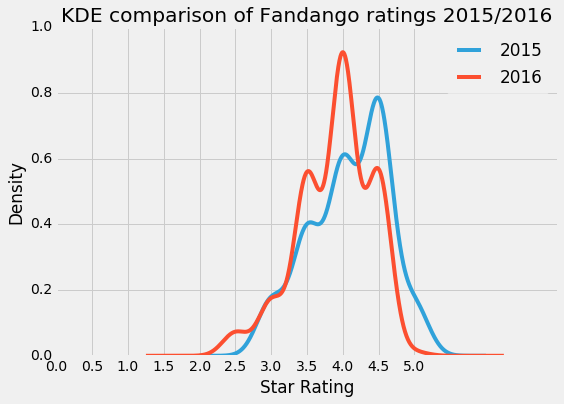

In [12]:
before['Fandango_Stars'].plot.kde(label='2015', legend = True, figsize = (8,5.5))
after_2016['fandango'].plot.kde(label='2016', legend = True, figsize = (8,5.5))
plt.xlabel('Star Rating')
plt.xticks([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
plt.title('KDE comparison of Fandango ratings 2015/2016')

Both distributions are strongly left skewed and both show very similar densities at lower star rates. The biggest difference visible is the peak density has reduced from 4.5 in 2015 to 4 in 2016. This means in general, films in 2016 were rated lower than 2015 and as such the distribution has shifted slightly to the left.

## Comparing Relative Frequency

We are now going to analyse more granular information in the form of frequency distribution tables. 

In [15]:
print('2015 star %s' + '\n' + '-' * 16)
before['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100

2015 star %s
----------------


3.0     8.219178
3.5    18.493151
4.0    28.082192
4.5    37.671233
5.0     7.534247
Name: Fandango_Stars, dtype: float64

In [16]:
print('2016 star %s' + '\n' + '-' * 16)
after_2016['fandango'].value_counts(normalize=True).sort_index()* 100

2016 star %s
----------------


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

We have normalised the ratings as opposed to using absolute frequecies to account for different sample sizes. 

There is indeed a clear difference between the two distributions however the direction of the difference is not as clear as in the kernel density plots.




## Determining the direction of change

In [32]:
mean_2015 = before['Fandango_Stars'].mean()
mean_2016 = after_2016['fandango'].mean()

median_2015 = before['Fandango_Stars'].median()
median_2016 = after_2016['fandango'].median()

mode_2015 = before['Fandango_Stars'].mode()[0] # the output of Series.mode() is a bit uncommon
mode_2016 = after_2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.089041,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


Both the mean and mode in 2016 are less than their 2015 counterparts. We can easily visualise this using a grouped bar plot:

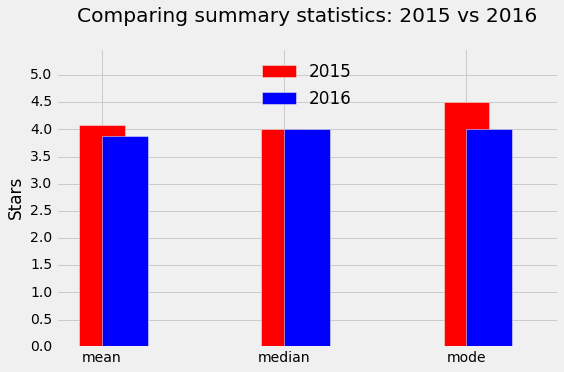

In [56]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color='red', label='2015', align='center', width=0.25, rot=0)
summary['2016'].plot.bar(color='blue', label='2016', align='edge', width=0.25, rot=0, figsize=(8,5))
plt.yticks(np.arange(0,5.1,.5))
plt.ylim(0,5.5)
plt.ylabel('Stars')
plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.legend(framealpha=0, loc='upper center')
plt.show()

## Conclusion

Whilst the median score between 2015/2016 remained the same, there was a drop in the mode of 0.5 and a drop in the mean value of 0.2. 

Whilst there are many possible explanations as to why popular movies in 2016 rated lower than in 2015, it is highly plausible this was caused due to Fandango altering their rating system after Hickey's analysis.